In [1]:
# Import Required Modules
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to extract features from audio file
def getFeaturesTest(filename):

    # Reading File
    y,sr=librosa.load(filename)

    # Mel Frequency Cepstral Coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Short Term Fourier Transform
    stft = np.abs(librosa.stft(y))

    # Chromagram from STFT
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)

    # Spectral Contrasts
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)

    # Tonal Centroid Features
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T,axis=0)

    # Flatten the array
    features = np.concatenate((mfcc, chroma, mel, contrast, tonnetz), axis=0)
    return np.array([features])

In [3]:
# Import Dataset
data = pd.read_csv('AudioFeaturesDataset6classes.csv')

# Input Features
x = np.array(data.drop(['Class'], axis=1))

# Label (Output Feature)
y = []
for i in range(data.shape[0]):
	y.append(data.iloc[i,-1])
		
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
print(np.unique(y))
classes=label_encoder.classes_
print(classes)

# Randomize Data
x,y = shuffle(x, np.array(y))

[0 1 2 3 4 5]
['Axecutting_Sounds' 'Chainsaw_Sounds' 'Forest_Sounds' 'Handsaw_Sounds'
 'Rain&Thunder_Sounds' 'Wind_Sounds']


In [4]:
# Splitting data for Training, Testing and Validation
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.15, random_state=101)

Logistic Regression (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [5]:
# Logistic Regression Training on 4 Classes data
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
ypred = LR.predict(xtest)
ypredprobslr = LR.predict_proba(xtest)
print("Logistic Regression Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('Precision: %.3f' % precision_score(ytest, ypred,average='weighted'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred, average='weighted'))

Logistic Regression Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
Precision: 0.952
Recall: 0.952
Accuracy: 0.952
F1 Score: 0.952


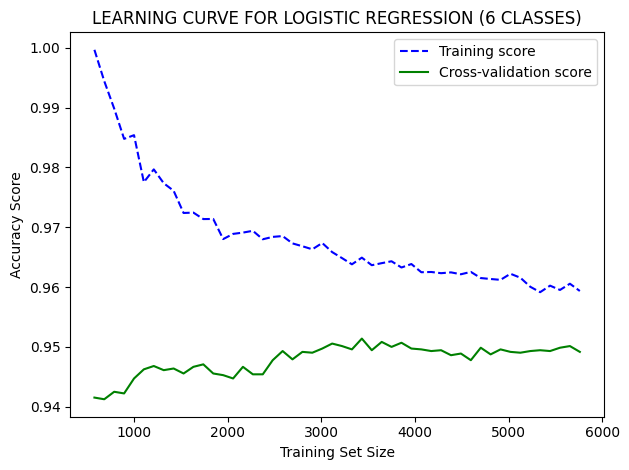

In [6]:
# Logistic Regression Learning Curve on 4 Classes data
sizes, training_scores, testing_scores = learning_curve(LR, x, y, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR LOGISTIC REGRESSION (6 CLASSES)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

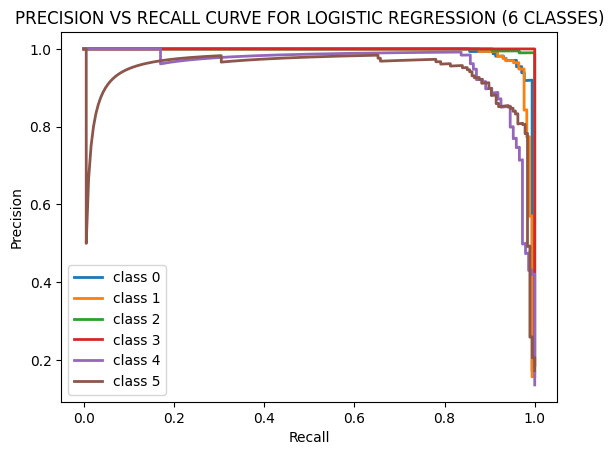

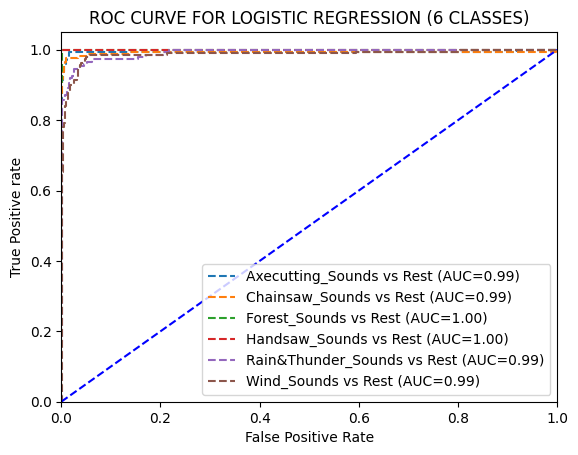

In [7]:
# Precision vs Recall curve for logistic regression on 6 Classes data
ytestbinarized=label_binarize(ytest,classes=np.unique(ytest))
n_class = classes.shape[0]

precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(ytestbinarized[:, i],
                                                        ypredprobslr[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR LOGISTIC REGRESSION (6 CLASSES)")
plt.show()

# ROC curve for logistic regression on 4 Classes data
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytestbinarized[:,i], ypredprobslr[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC CURVE FOR LOGISTIC REGRESSION (6 CLASSES)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

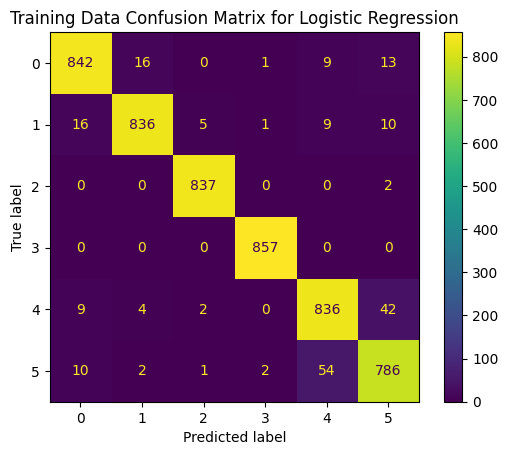

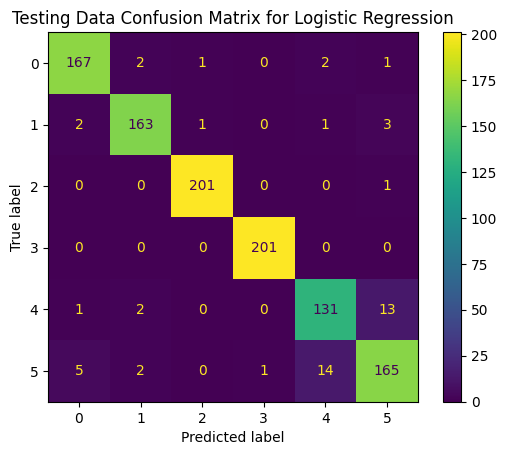

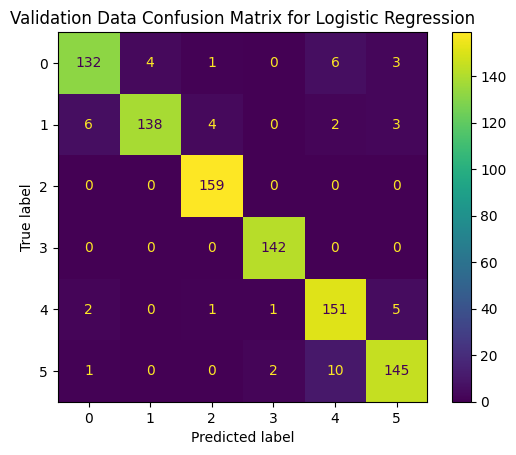

In [8]:
# Logistic Regression Confusion Matrices on 6 Classes data
preds = LR.predict(xtrain)
cm = confusion_matrix(ytrain,preds,labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
disp.plot()
plt.title('Training Data Confusion Matrix for Logistic Regression')
plt.show()

preds = LR.predict(xtest)
cm = confusion_matrix(ytest,preds,labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
disp.plot()
plt.title('Testing Data Confusion Matrix for Logistic Regression')
plt.show()

preds = LR.predict(xval)
cm = confusion_matrix(yval,preds,labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
disp.plot()
plt.title('Validation Data Confusion Matrix for Logistic Regression')
plt.show()

In [9]:
# Custom Testing Logistic Regression (6-Classes) (0-Axecutting, 1-Chainsaw, 2-Forest, 3-Handsaw, 4-Rain & Thunder, 5-Wind)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = LR.predict(testData)
print(prediction)

Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[4]


Decision Tree (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [10]:
# Decision Tree Training on 6 Classes data
DT = DecisionTreeClassifier(max_depth = 10, random_state = 100)
DT.fit(xtrain, ytrain)
pred = DT.predict(xtest)
ypredprobsdt = DT.predict_proba(xtest)
print("Decision Tree Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('Precision: %.3f' % precision_score(ytest, ypred,average='weighted'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred, average='weighted'))

Decision Tree Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
Precision: 0.952
Recall: 0.952
Accuracy: 0.952
F1 Score: 0.952


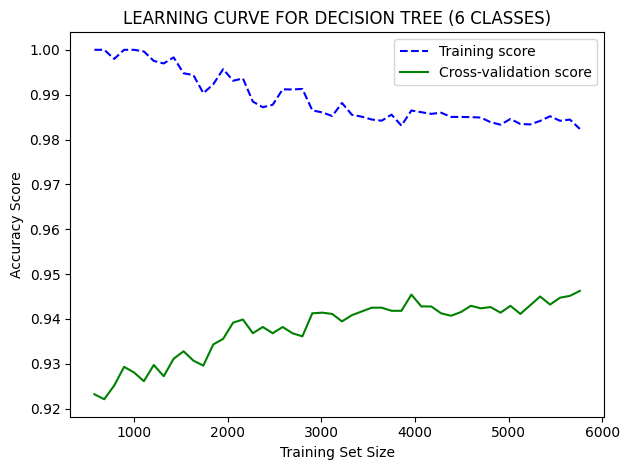

In [11]:
# Decision Tree learning Curve on 6 Classes data
sizes, training_scores, testing_scores = learning_curve(DT, x, y, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR DECISION TREE (6 CLASSES)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

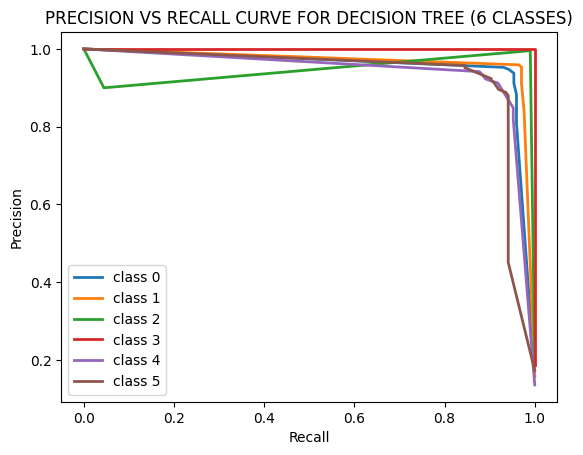

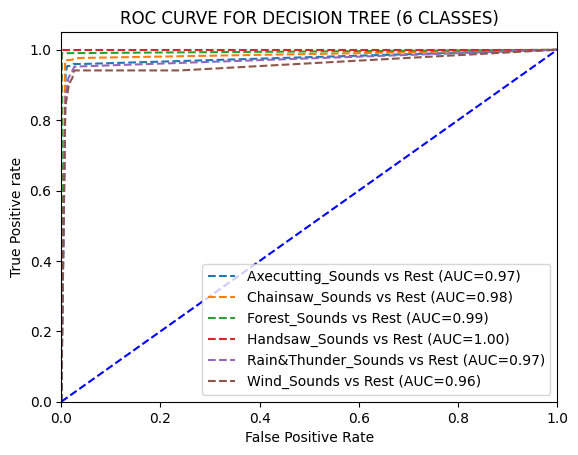

In [12]:
# Precision vs Recall curve for Decision Tree on 6 Classes data
ytestbinarized=label_binarize(ytest,classes=np.unique(ytest))
n_class = classes.shape[0]

precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(ytestbinarized[:, i],
                                                        ypredprobsdt[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR DECISION TREE (6 CLASSES)")
plt.show()

# ROC curve for Decision Tree on 4 Classes data
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytestbinarized[:,i], ypredprobsdt[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC CURVE FOR DECISION TREE (6 CLASSES)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

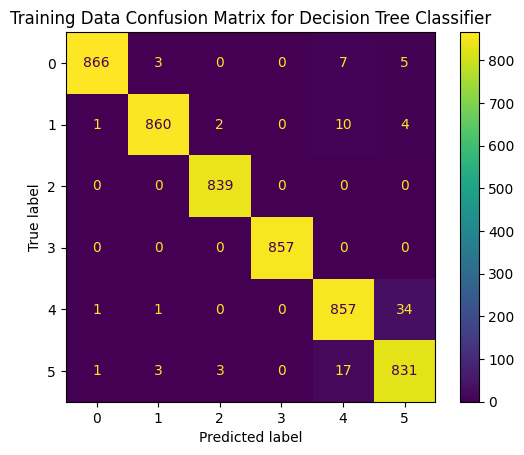

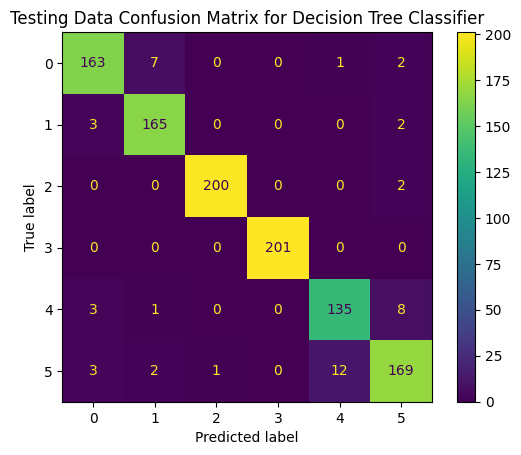

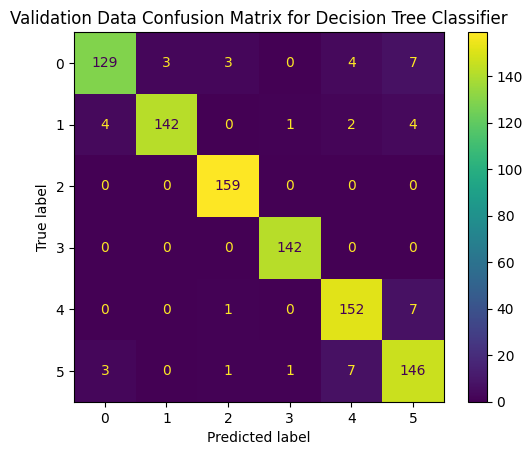

In [13]:
# Decision Tree Confusion Matrices on 6 Classes data
preds = DT.predict(xtrain)
cm = confusion_matrix(ytrain,preds,labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.title('Training Data Confusion Matrix for Decision Tree Classifier')
plt.show()

preds = DT.predict(xtest)
cm = confusion_matrix(ytest,preds,labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.title('Testing Data Confusion Matrix for Decision Tree Classifier')
plt.show()

preds = DT.predict(xval)
cm = confusion_matrix(yval,preds,labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.title('Validation Data Confusion Matrix for Decision Tree Classifier')
plt.show()

In [14]:
# Custom Testing Decision Tree (6-Classes) (0-Axecutting, 1-Chainsaw, 2-Forest, 3-Handsaw, 4-Rain & Thunder, 5-Wind)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = DT.predict(testData)
print(prediction)

Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[5]


Random Forest Classifier (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [15]:
# Random Forest Classifier Training on 6 Classes data
RF = RandomForestClassifier(max_depth = 10, random_state = 100) # Number of Decision Trees
RF.fit(xtrain, ytrain)
ypred = RF.predict(xtest)
ypredprobsrf = RF.predict_proba(xtest)
print("Random Forest Classifier Machine Learning Model Metrics for 4 classes is (Chainsaw, Forest, Handsaw, Rain & Thunder): ")
print('Precision: %.3f' % precision_score(ytest, ypred,average='weighted'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred, average='weighted'))

Random Forest Classifier Machine Learning Model Metrics for 4 classes is (Chainsaw, Forest, Handsaw, Rain & Thunder): 
Precision: 0.968
Recall: 0.968
Accuracy: 0.968
F1 Score: 0.967


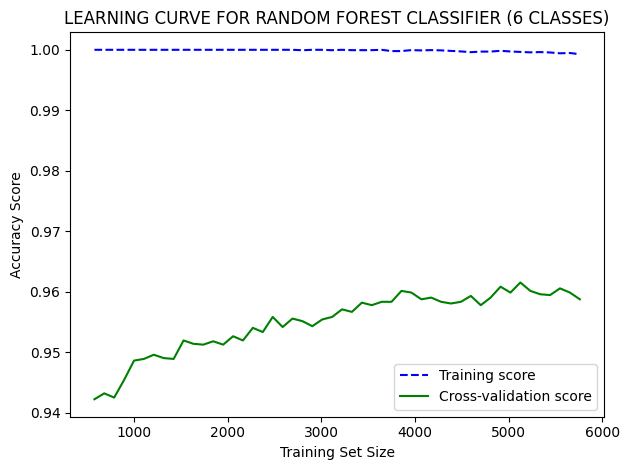

In [16]:
# Random Forest Classifier Learning Curve on 6 Classes data
sizes, training_scores, testing_scores = learning_curve(RF, x, y, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR RANDOM FOREST CLASSIFIER (6 CLASSES)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

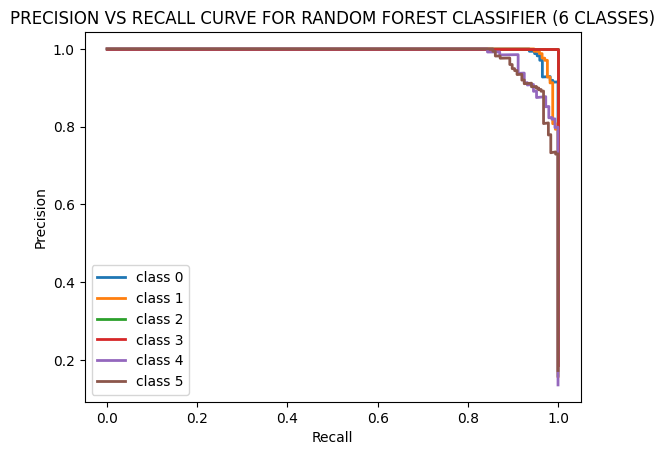

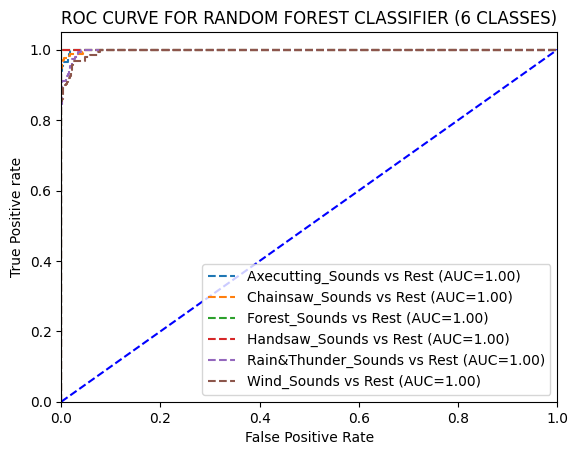

In [17]:
# Precision vs Recall curve for Random Forest Classifier on 6 Classes data
ytestbinarized=label_binarize(ytest,classes=np.unique(ytest))
n_class = classes.shape[0]

precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(ytestbinarized[:, i],
                                                        ypredprobsrf[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR RANDOM FOREST CLASSIFIER (6 CLASSES)")
plt.show()

# ROC curve for Random Forest Classifier on 4 Classes data
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytestbinarized[:,i], ypredprobsrf[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC CURVE FOR RANDOM FOREST CLASSIFIER (6 CLASSES)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

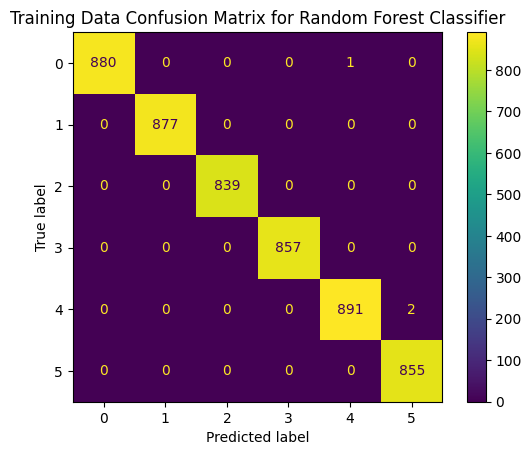

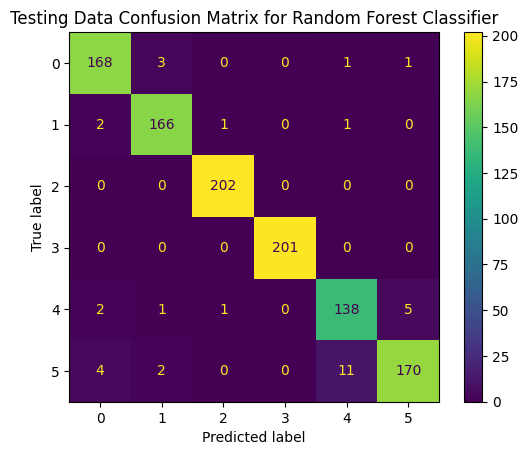

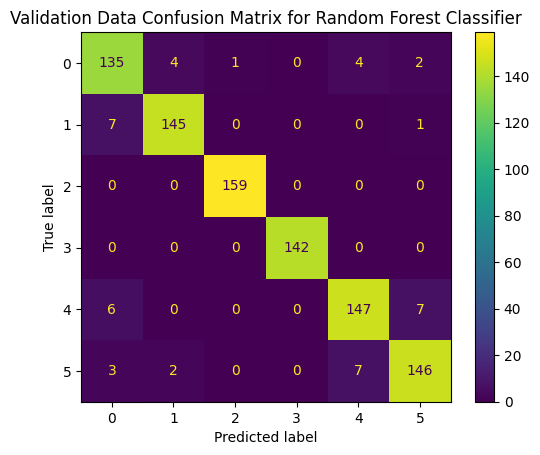

In [18]:
# Random Forest Classifier Confusion Matrices on 6 Classes data
preds = RF.predict(xtrain)
cm = confusion_matrix(ytrain,preds,labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.title('Training Data Confusion Matrix for Random Forest Classifier')
plt.show()

preds = RF.predict(xtest)
cm = confusion_matrix(ytest,preds,labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.title('Testing Data Confusion Matrix for Random Forest Classifier')
plt.show()

preds = RF.predict(xval)
cm = confusion_matrix(yval,preds,labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.title('Validation Data Confusion Matrix for Random Forest Classifier')
plt.show()  

In [19]:
# Custom Testing Random Forest (6-Classes) (0-Axecutting, 1-Chainsaw, 2-Forest, 3-Handsaw, 4-Rain & Thunder, 5-Wind)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = RF.predict(testData)
print(prediction)

Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[5]


Support Vector Machine (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [20]:
# Support Vector Machine (Classifier) Training on 6 Classes data
SVM = svm.SVC(kernel='poly',probability=True) # Poly Kernel
SVM.fit(xtrain, ytrain)
ypred = SVM.predict(xtest)
ypredprobssvm = SVM.predict_proba(xtest)
print("Support Vector Classifier Machine Learning Model Metrics for 4 classes is (Chainsaw, Forest, Handsaw, Rain & Thunder): ")
print('Precision: %.3f' % precision_score(ytest, ypred,average='weighted'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred, average='weighted'))

Support Vector Classifier Machine Learning Model Metrics for 4 classes is (Chainsaw, Forest, Handsaw, Rain & Thunder): 
Precision: 0.933
Recall: 0.931
Accuracy: 0.931
F1 Score: 0.931


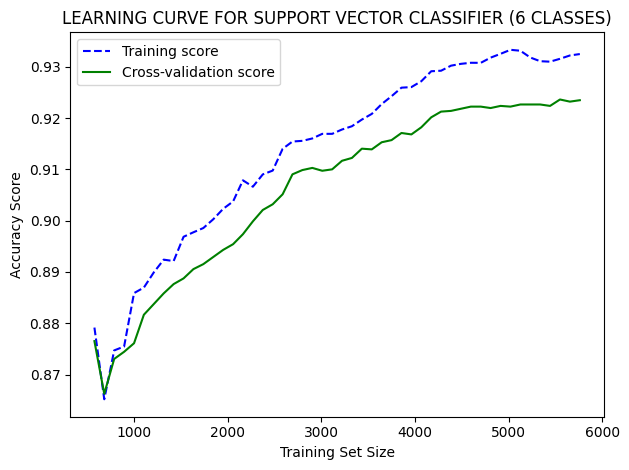

In [21]:
# Support Vector Machine (Classifier) Learning Curve on 6 Classes data
sizes, training_scores, testing_scores = learning_curve(SVM, x, y, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR SUPPORT VECTOR CLASSIFIER (6 CLASSES)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

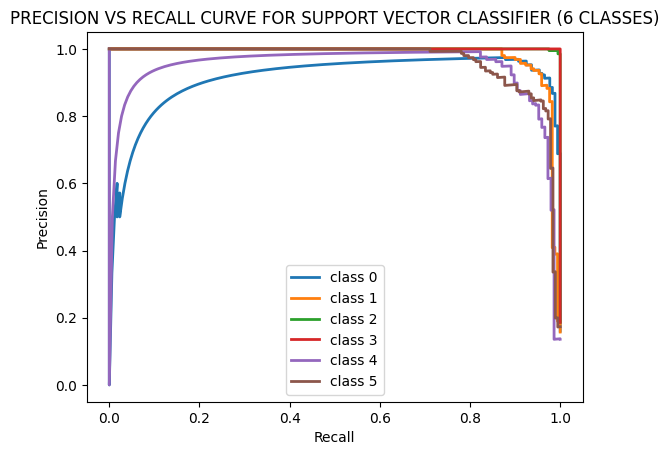

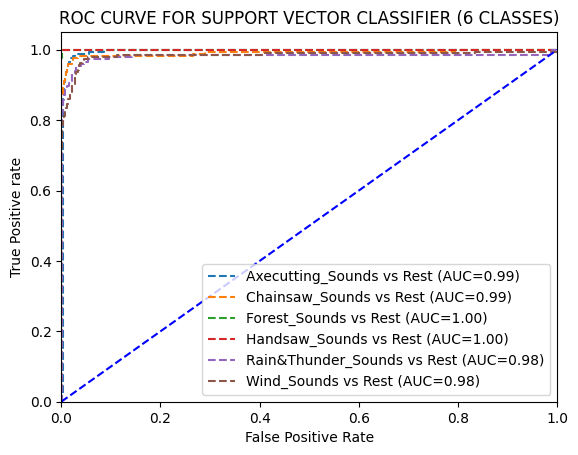

In [22]:
# Precision vs Recall curve for Support Vector Machine (Classifier) on 6 Classes data
ytestbinarized=label_binarize(ytest,classes=np.unique(ytest))
n_class = classes.shape[0]

precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(ytestbinarized[:, i],
                                                        ypredprobssvm[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR SUPPORT VECTOR CLASSIFIER (6 CLASSES)")
plt.show()

# ROC curve for Support Vector Machine (Classifier) on 6 Classes data
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytestbinarized[:,i], ypredprobssvm[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC CURVE FOR SUPPORT VECTOR CLASSIFIER (6 CLASSES)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

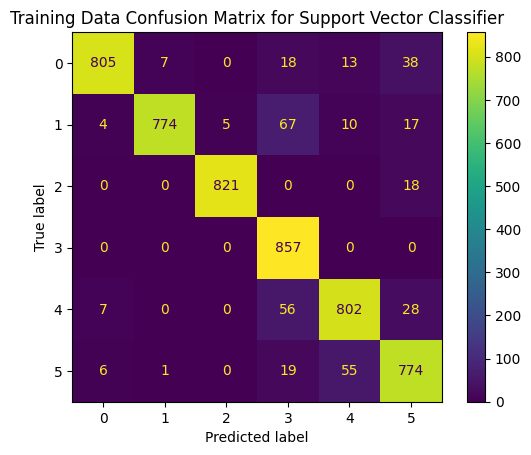

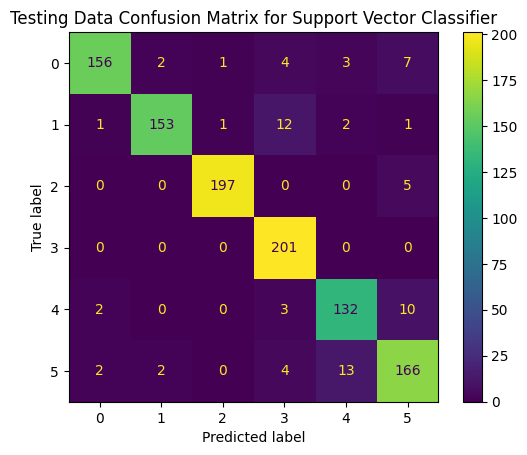

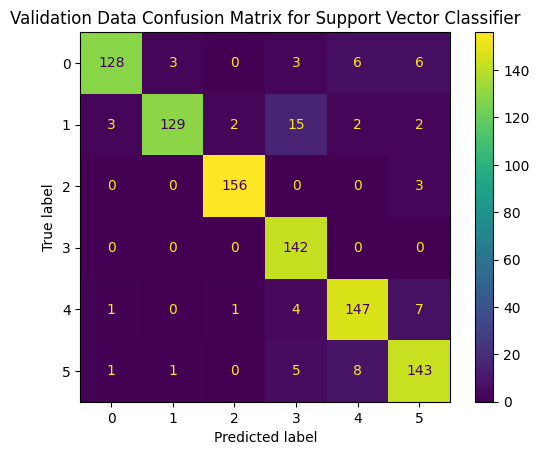

In [23]:
# Support Vector Machine (Classifier) Confusion Matrices on 6 Classes data
preds = SVM.predict(xtrain)
cm = confusion_matrix(ytrain,preds,labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.title('Training Data Confusion Matrix for Support Vector Classifier')
plt.show()

preds = SVM.predict(xtest)
cm = confusion_matrix(ytest,preds,labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.title('Testing Data Confusion Matrix for Support Vector Classifier')
plt.show()

preds = SVM.predict(xval)
cm = confusion_matrix(yval,preds,labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.title('Validation Data Confusion Matrix for Support Vector Classifier')
plt.show()

In [24]:
# Custom Testing Support Vector Machine (SVM) (6-Classes) (0-Axecutting, 1-Chainsaw, 2-Forest, 3-Handsaw, 4-Rain & Thunder, 5-Wind)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = SVM.predict(testData)
print(prediction)

Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[4]


K-Nearest Neighbors Classifier (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [25]:
# KNN Classifier Training on 6 Classes data
KNN = KNeighborsClassifier(n_neighbors=100) # Number of Neighbors
KNN.fit(xtrain, ytrain)
ypred = KNN.predict(xtest)
ypredprobsknn = KNN.predict_proba(xtest)
print("K-Nearest Neighbors Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('Precision: %.3f' % precision_score(ytest, ypred,average='weighted'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred, average='weighted'))

K-Nearest Neighbors Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
Precision: 0.937
Recall: 0.935
Accuracy: 0.935
F1 Score: 0.935


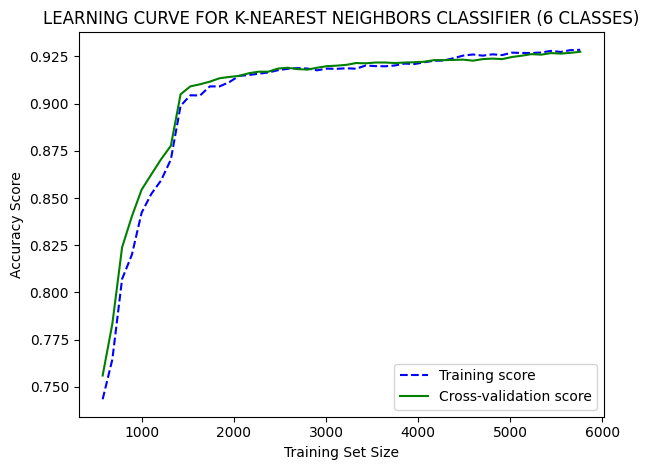

In [26]:
# K-Nearest Neighbors Classifier Learning Curve on 6 Classes data
sizes, training_scores, testing_scores = learning_curve(KNN, x, y, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR K-NEAREST NEIGHBORS CLASSIFIER (6 CLASSES)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

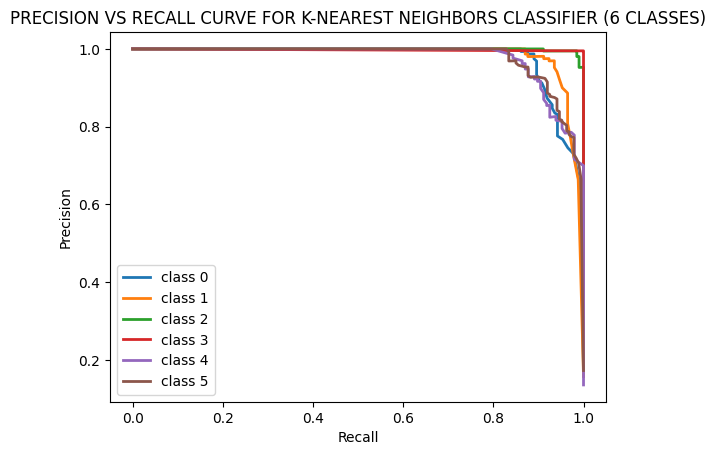

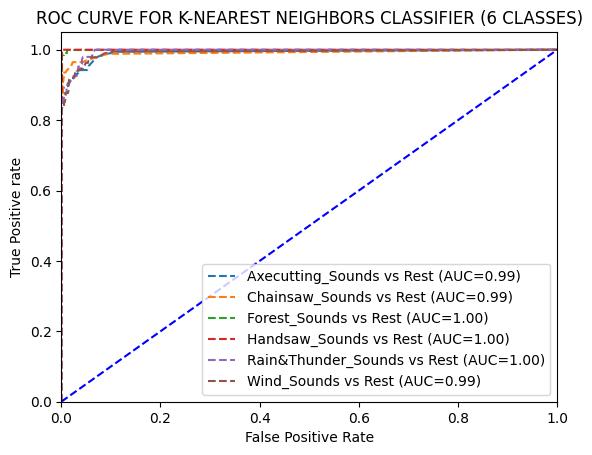

In [27]:
# Precision vs Recall curve for K-Nearest Neighbors Classifier on 6 Classes data
ytestbinarized=label_binarize(ytest,classes=np.unique(ytest))
n_class = classes.shape[0]

precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(ytestbinarized[:, i],
                                                        ypredprobsknn[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR K-NEAREST NEIGHBORS CLASSIFIER (6 CLASSES)")
plt.show()

# ROC curve for K-Nearest Neighbors Classifier on 4 Classes data
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytestbinarized[:,i], ypredprobsknn[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC CURVE FOR K-NEAREST NEIGHBORS CLASSIFIER (6 CLASSES)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

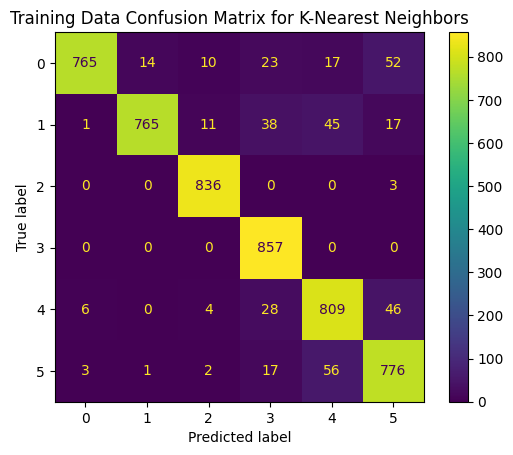

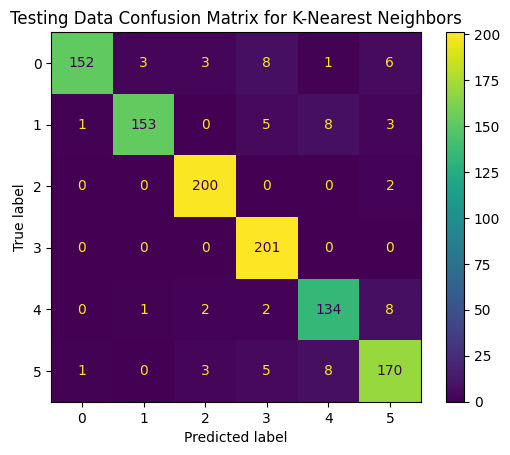

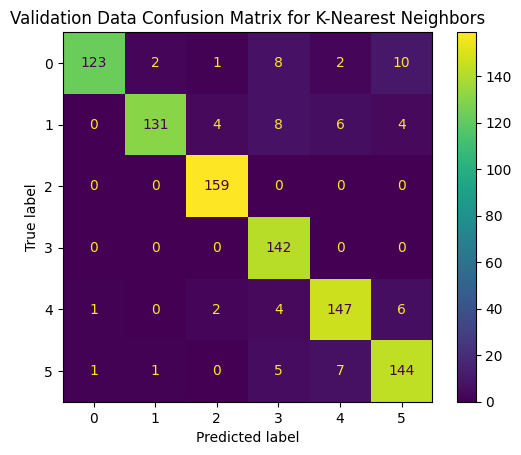

In [28]:
# K-Nearest Neighbors Classifier Confusion Matrices on 6 Classes data
preds = KNN.predict(xtrain)
cm = confusion_matrix(ytrain,preds,labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.title('Training Data Confusion Matrix for K-Nearest Neighbors')
plt.show()

preds = KNN.predict(xtest)
cm = confusion_matrix(ytest,preds,labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.title('Testing Data Confusion Matrix for K-Nearest Neighbors')
plt.show()

preds = KNN.predict(xval)
cm = confusion_matrix(yval,preds,labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.title('Validation Data Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [29]:
# Custom Testing K-Nearest Neighbors (KNN) (6-Classes) (0-Axecutting, 1-Chainsaw, 2-Forest, 3-Handsaw, 4-Rain & Thunder, 5-Wind)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = KNN.predict(testData)
print(prediction)

Shape of features : (1, 193)
[0]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[1]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[2]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[3]
Shape of features : (1, 193)
[4]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[5]
Shape of features : (1, 193)
[5]


# Accuracy of All the Models

In [30]:
# Logistic Regression Training on 6 Classes data
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
ypred = LR.predict(xtest)
ypredprobslr = LR.predict_proba(xtest)
print("\n1 - Logistic Regression Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('    Accuracy: %.6f' % accuracy_score(ytest, ypred))
print('    F1 Score: %.6f' % f1_score(ytest, ypred, average='weighted'))

# Decision Tree Training on 6 Classes data
DT = DecisionTreeClassifier(max_depth = 10, random_state = 100)
DT.fit(xtrain, ytrain)
pred = DT.predict(xtest)
ypredprobsdt = DT.predict_proba(xtest)
print("\n2 - Decision Tree Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('    Accuracy: %.6f' % accuracy_score(ytest, ypred))
print('    F1 Score: %.6f' % f1_score(ytest, ypred, average='weighted'))

# Random Forest Classifier Training on 6 Classes data
RF = RandomForestClassifier(max_depth = 10, random_state = 100) # Number of Decision Trees
RF.fit(xtrain, ytrain)
ypred = RF.predict(xtest)
ypredprobsrf = RF.predict_proba(xtest)
print("\n3 - Random Forest Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('    Accuracy: %.6f' % accuracy_score(ytest, ypred))
print('    F1 Score: %.6f' % f1_score(ytest, ypred, average='weighted'))

# Support Vector Machine (Classifier) Training on 6 Classes data
SVM = svm.SVC(kernel='poly',probability=True) # Poly Kernel
SVM.fit(xtrain, ytrain)
ypred = SVM.predict(xtest)
ypredprobssvm = SVM.predict_proba(xtest)
print("\n4 - Support Vector Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('    Accuracy: %.6f' % accuracy_score(ytest, ypred))
print('    F1 Score: %.6f' % f1_score(ytest, ypred, average='weighted'))

# KNN Classifier Training on 6 Classes data
KNN = KNeighborsClassifier(n_neighbors=100) # Number of Neighbors
KNN.fit(xtrain, ytrain)
ypred = KNN.predict(xtest)
ypredprobsknn = KNN.predict_proba(xtest)
print("\n5 - K-Nearest Neighbors Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
print('    Accuracy: %.6f' % accuracy_score(ytest, ypred))
print('    F1 Score: %.6f' % f1_score(ytest, ypred, average='weighted'))


1 - Logistic Regression Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
    Accuracy: 0.951852
    F1 Score: 0.951728

2 - Decision Tree Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
    Accuracy: 0.951852
    F1 Score: 0.951728

3 - Random Forest Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
    Accuracy: 0.967593
    F1 Score: 0.967490

4 - Support Vector Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
    Accuracy: 0.930556
    F1 Score: 0.930618

5 - K-Nearest Neighbors Classifier Machine Learning Model Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
    Accuracy: 0.935185
    F1 Score: 0.934962
